In [2]:
import threading
import os
import numpy as np
import csv

def extract_tracklets(camera_dir, cam_id, max_dt = 24 * 3):
    csv_path = os.path.join(camera_dir, "coords_fib_cam_{}.csv".format(cam_id))
    with open(csv_path, newline='') as csvfile:
        ages = dict()
        tracklets = dict()
        last_frame = 0 
        reader = csv.DictReader(csvfile)
        for row in reader:
            #bbox = [int(row[col]) for col in ["x_top_left_BB","y_top_left_BB","x_bottom_right_BB","y_bottom_right_BB"]]
            person_id  = int(row["person_id"])
            curr_frame = int(row["frame_no_cam"])
            
            row_int = [int(i) for i in row.values()]
            
            if person_id not in tracklets:
                tracklets[person_id] = [row_int]
            else:
                tracklets[person_id].append(row_int)
            if curr_frame != last_frame:
                last_frame = curr_frame
        
    [np.savetxt(f'tracks/{cam_id}_{_id}.tracklet.txt', np.array(tracklets[_id]), fmt='%d') for _id in tracklets]
         

def generate_tracklets(dataset_dir = "raw_data/videos/MTA_ext_short/test", ids = [0,1,2,3,4,5]):
    ids = set(ids)
    jobs = [] 
    for _id in ids:
        cam_path = os.path.join(dataset_dir,"cam_{}".format(_id))
        jobs.append(threading.Thread(target=extract_tracklets, args=(cam_path,_id)))
    for job in jobs:
        job.start()
    for job in jobs:
        job.join()

    
def extract_candidate_matches(search_tracklet, all_tracklets):
    cam, start_frame, _, _ = search_tracklet[0]
    cam, stop_frame, _, _ = search_tracklet[-1]
    candidates = []
    dt = 24 * 3
     
    for tracklet in all_tracklets:
        my_cam, my_start_frame, _, _,_,_ = search_tracklet[0]
        my_cam, my_stop_frame, _,_,_, _ = search_tracklet[-1]
        if my_cam == cam:
            continue
        if ((start_frame - dt) <= my_start_frame <= (stop_frame + dt)) or ((start_frame - dt) <= my_stop_frame <= (stop_frame + dt)):
            candidates.apennd(tracklet)
            
def generate_candidate_matches():
    b = np.loadtxt('test1.txt', dtype=int)
    pass

# tracklet: 
# cam_id, frame_num, person_id, bbox
# generate_tracklets()

#find_candidate_matches(sample_tracklets, [sample_tracklets,sample_tracklets,sample_tracklets])

In [3]:
import glob, os
#os.chdir("")
all_tracklets = []
for file in glob.glob("tracks/*tracklet.txt"):
    cam_id, person_id = file.split(".")[0].split("_")
    data = np.loadtxt(file, dtype=int)
    all_tracklets.append(data)


In [4]:
print(all_tracklets)

[array([[   0, 2003, 1092,  270, 1162,  411],
       [   1, 2003, 1092,  269, 1155,  411],
       [   2, 2003, 1093,  269, 1147,  411],
       ...,
       [ 283, 2003, -395,  790,   88, 1031],
       [ 284, 2003, -414,  796,   93, 1034],
       [ 285, 2003, -434,  802,   97, 1037]]), array([[4524, 2056, 1746,    5, 1752,   14],
       [4525, 2056, 1744,    4, 1751,   14],
       [4526, 2056, 1743,    4, 1750,   14],
       ...,
       [4918, 2056, 1528,    6, 1550,   48],
       [4919, 2056, 1528,    6, 1549,   48],
       [4920, 2056, 1528,    6, 1548,   48]]), array([[3711, 2045, 1913,   78, 1948,  100],
       [3712, 2045, 1913,   78, 1948,  100],
       [3713, 2045, 1913,   78, 1947,  104],
       ...,
       [4918, 2045, 1429,   84, 1437,  111],
       [4919, 2045, 1429,   83, 1437,  111],
       [4920, 2045, 1428,   83, 1436,  111]]), array([[3619, 2034,  934,  -35,  950,    5],
       [3620, 2034,  933,  -35,  950,    5],
       [3621, 2034,  933,  -35,  949,    5],
       ...,


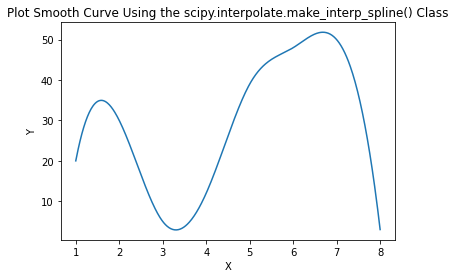

In [20]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([20, 30, 5, 12, 39, 48, 50, 3])
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
np.array([(0,0,1,[0,0,0,0]),(0,1,1,[0,0,0,0]),(0,2,1,[0,0,0,0]),(0,3,1,[0,0,0,0]),(1,0,1,[0,0,0,0]),(1,1,1,[0,0,0,0]),(1,2,1,[0,0,0,0]),(1,3,1,[0,0,0,0]),(2,0,1,[0,0,0,0]),(2,1,1,[0,0,0,0]),(2,2,1,[0,0,0,0]),(2,3,1,[0,0,0,0])]

)


<ipython-input-14-d143e9f1542e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([(0,0,1,[0,0,0,0]),(0,1,1,[0,0,0,0]),(0,2,1,[0,0,0,0]),(0,3,1,[0,0,0,0]),(1,0,1,[0,0,0,0]),(1,1,1,[0,0,0,0]),(1,2,1,[0,0,0,0]),(1,3,1,[0,0,0,0]),(2,0,1,[0,0,0,0]),(2,1,1,[0,0,0,0]),(2,2,1,[0,0,0,0]),(2,3,1,[0,0,0,0])]


array([[0, 0, 1, list([0, 0, 0, 0])],
       [0, 1, 1, list([0, 0, 0, 0])],
       [0, 2, 1, list([0, 0, 0, 0])],
       [0, 3, 1, list([0, 0, 0, 0])],
       [1, 0, 1, list([0, 0, 0, 0])],
       [1, 1, 1, list([0, 0, 0, 0])],
       [1, 2, 1, list([0, 0, 0, 0])],
       [1, 3, 1, list([0, 0, 0, 0])],
       [2, 0, 1, list([0, 0, 0, 0])],
       [2, 1, 1, list([0, 0, 0, 0])],
       [2, 2, 1, list([0, 0, 0, 0])],
       [2, 3, 1, list([0, 0, 0, 0])]], dtype=object)